## Boston

In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

2025-09-26 15:03:48.110115: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-26 15:03:48.112095: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-26 15:03:48.301351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-26 15:03:50.465288: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

404
102


In [4]:
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()

train_data_ss = ss_scaler.fit_transform(train_data)
test_data_ss = ss_scaler.transform(test_data)

In [11]:
train_data_ss.shape

(404, 13)

In [15]:
keras.backend.clear_session()

model_boston = keras.models.Sequential()

model_boston.add( keras.layers.Input(shape=(train_data_ss.shape[1],)) )
model_boston.add( keras.layers.Dense(256, activation='relu') )
model_boston.add( keras.layers.Dense(128, activation='relu') )
model_boston.add( keras.layers.Dense(64, activation='relu') )
model_boston.add( keras.layers.Dense(1) )

model_boston.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_boston.compile(loss=keras.losses.MeanSquaredError(),
                     metrics=['mae'],
                     optimizer='adam',
                     )

In [17]:
history = model_boston.fit(train_data_ss, train_labels,
                           validation_split=0.2,
                           epochs=100, verbose=1
                           )

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 523.6143 - mae: 20.9129 - val_loss: 512.1068 - val_mae: 20.6578
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 360.2181 - mae: 16.5485 - val_loss: 257.2062 - val_mae: 13.6580
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 129.6490 - mae: 9.2642 - val_loss: 89.4013 - val_mae: 7.4456
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80.4803 - mae: 6.7250 - val_loss: 53.5113 - val_mae: 5.6155
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.5159 - mae: 4.5469 - val_loss: 39.6453 - val_mae: 4.5466
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.1393 - mae: 3.7845 - val_loss: 25.6341 - val_mae: 3.8362
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.4455 - mae: 3.6117 - val_loss: 22.3263 - val_mae: 3.6652
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.7379 - mae: 3.2085 - val_loss: 21.8535 - val_mae: 3.5129
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━

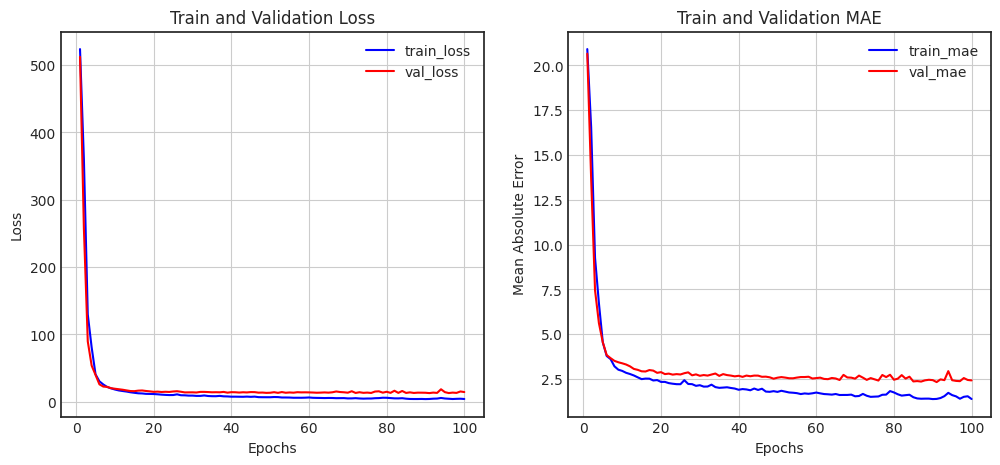

In [ ]:

plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error')
ax2.grid()
ax2.legend()

plt.show()

In [24]:
model_boston.evaluate(test_data_ss, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4412 - mae: 2.7836 


[19.441205978393555, 2.783639669418335]

## Reuters

In [5]:
import numpy as np
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

In [29]:
(train_data, train_labels), (test_data, test_labels)= reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=2025)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [34]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros( (len(data), dim) )
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = keras.utils.to_categorical(train_labels)
y_val = keras.utils.to_categorical(val_labels)
y_test = keras.utils.to_categorical(test_labels)

In [45]:
keras.backend.clear_session()

model_reuters = keras.models.Sequential()

model_reuters.add( keras.layers.Input(shape=(x_train.shape[1],) ) )
model_reuters.add( keras.layers.Dense(512, activation='relu') )
model_reuters.add( keras.layers.BatchNormalization() )
model_reuters.add( keras.layers.Dropout(0.25) )
model_reuters.add( keras.layers.Dense(256, activation='relu') )
model_reuters.add( keras.layers.BatchNormalization() )
model_reuters.add( keras.layers.Dropout(0.25) )
model_reuters.add( keras.layers.Dense(128, activation='relu') )
model_reuters.add( keras.layers.BatchNormalization() )
model_reuters.add( keras.layers.Dropout(0.25) )
model_reuters.add( keras.layers.Dense(y_train.shape[1], activation='softmax') )

model_reuters.compile(loss='categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam',
                      )

model_reuters.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,294,254 (20.20 MB)

 Trainable params: 5,292,462 (20.19 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=4,
                   verbose=1,
                   restore_best_weights=True,
                   )

mcp = ModelCheckpoint('checkpoint.keras',
                      monitor='val_loss',
                      verbose=1,
                      save_best_only=True,
                      )

history = model_reuters.fit(x_train, y_train,
                            validation_data=(x_val, y_val),
                            callbacks=[es, mcp],
                            epochs=100,
                            verbose=1,
                            )

Epoch 1/100
191/211 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5227 - loss: 2.2736
Epoch 1: val_loss improved from None to 1.30224, saving model to checkpoint.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6574 - loss: 1.6469 - val_accuracy: 0.7302 - val_loss: 1.3022
Epoch 2/100
103/211 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.8410 - loss: 0.7208
Epoch 2: val_loss improved from 1.30224 to 0.96484, saving model to checkpoint.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8425 - loss: 0.7130 - val_accuracy: 0.7947 - val_loss: 0.9648
Epoch 3/100
201/211 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8992 - loss: 0.4255
Epoch 3: val_loss did not improve from 0.96484
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9004 - loss: 0.4297 - val_accuracy: 0.8090 - val_loss: 1.0580
Epoch 4/100
122/211 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9435 - loss: 0.2615 
Epoch 4: val_loss did not improve from 0.96484
211/211 ━━━━━━━━━━━━━━━━━━━━ 

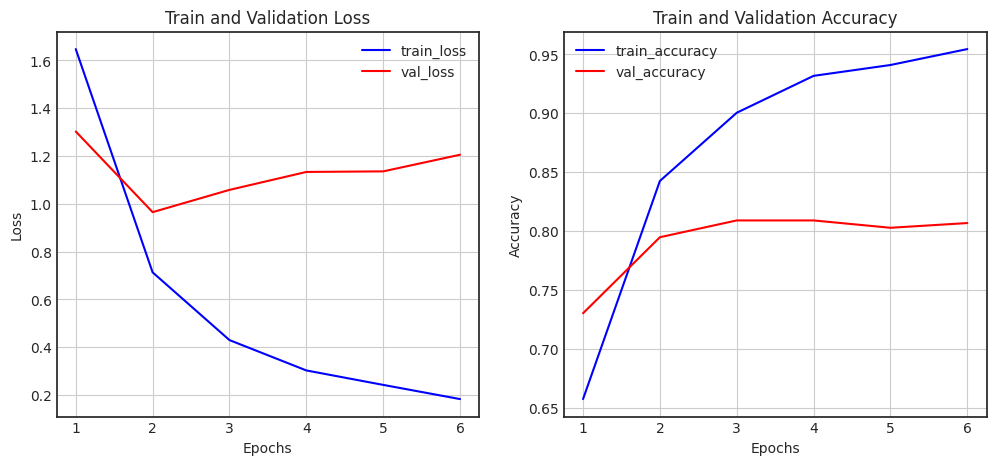

In [47]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [48]:
model_reuters.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7903 - loss: 0.9807


[0.9806538820266724, 0.7902938723564148]

## CIFAR-10

In [6]:
from keras.datasets import cifar10

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=2025,
                                                  )

print(f'전체 학습 데이터: {x_train_full.shape}, 레이블: {y_train_full.shape}')
print(f'학습 데이터: {x_train.shape}, 레이블: {y_train.shape}')
print(f'검증 데이터: {x_val.shape}, 레이블: {y_val.shape}')
print(f'테스트 데이터: {x_test.shape}, 레이블: {y_test.shape}')

전체 학습 데이터: (50000, 32, 32, 3), 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3), 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3), 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3), 레이블: (10000, 1)


In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

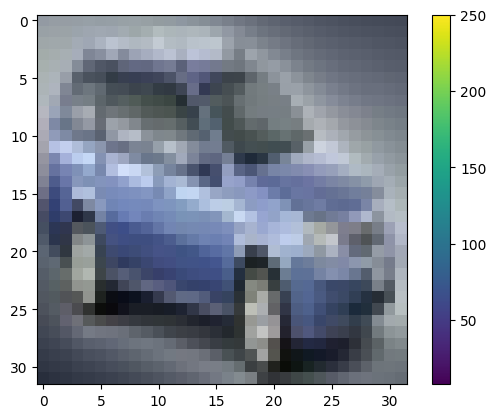

In [9]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.reshape( x_train.shape[0], -1 )
x_val = x_val.reshape( x_val.shape[0], -1 )
x_test = x_test.reshape( x_test.shape[0], -1 )

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [12]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [13]:
x_train.shape

(40000, 3072)

In [14]:
keras.backend.clear_session()

model_cifar = keras.models.Sequential()

model_cifar.add( keras.layers.Input(shape=(x_train.shape[1],)) )
model_cifar.add( keras.layers.Dense(256, activation='relu') )
model_cifar.add( keras.layers.BatchNormalization() )
model_cifar.add( keras.layers.Dropout(0.25) )
model_cifar.add( keras.layers.Dense(128, activation='relu') )
model_cifar.add( keras.layers.BatchNormalization() )
model_cifar.add( keras.layers.Dropout(0.25) )
model_cifar.add( keras.layers.Dense(64, activation='relu') )
model_cifar.add( keras.layers.BatchNormalization() )
model_cifar.add( keras.layers.Dropout(0.25) )
model_cifar.add( keras.layers.Dense(10, activation='softmax') )

model_cifar.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'],
                    optimizer='adam',
                    )

2025-09-26 15:04:27.303685: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model_cifar.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,282 (3.17 MB)

 Trainable params: 829,386 (3.16 MB)

 Non-trainable params: 896 (3.50 KB)

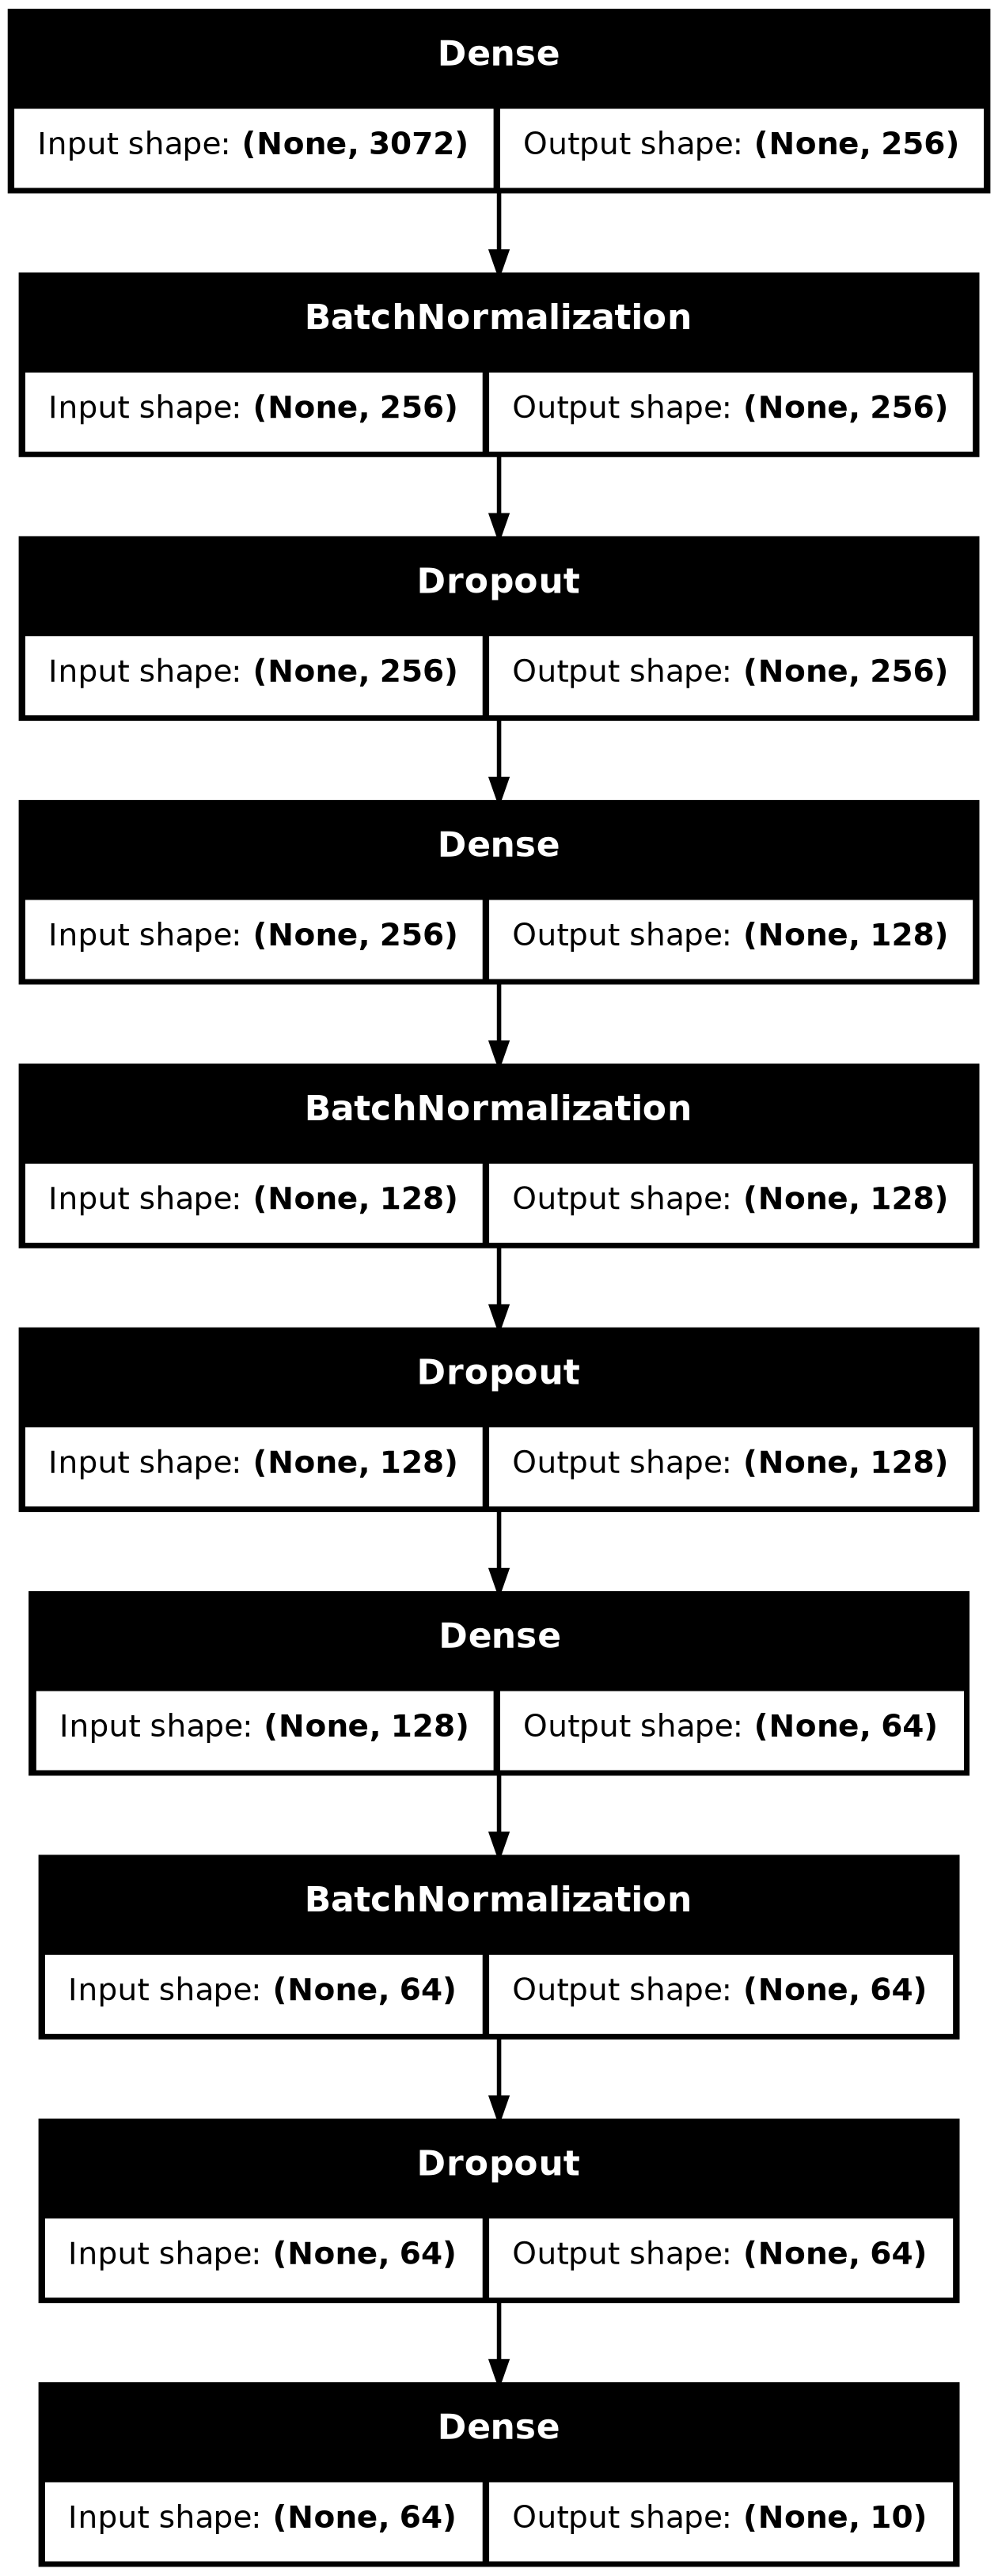

In [17]:
keras.utils.plot_model(model_cifar, show_shapes=True)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=4,
                   verbose=1,
                   restore_best_weights=True,
                   )

mcp = ModelCheckpoint('checkpoint.keras',
                      monitor='val_loss',
                      verbose=1,
                      save_best_only=True,
                      )

history = model_cifar.fit(x_train, y_train,
                            validation_data=(x_val, y_val),
                            callbacks=[es, mcp],
                            epochs=100,
                            verbose=1,
                            )

Epoch 1/100
1020/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2405 - loss: 2.2502
Epoch 1: val_loss improved from None to 1.78869, saving model to checkpoint.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2893 - loss: 2.0153 - val_accuracy: 0.3669 - val_loss: 1.7887
Epoch 2/100
 871/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3349 - loss: 1.8491
Epoch 2: val_loss improved from 1.78869 to 1.76140, saving model to checkpoint.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3474 - loss: 1.8158 - val_accuracy: 0.3670 - val_loss: 1.7614
Epoch 3/100
 921/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3649 - loss: 1.7734
Epoch 3: val_loss did not improve from 1.76140
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3614 - loss: 1.7714 - val_accuracy: 0.3296 - val_loss: 1.8970
Epoch 4/100
1061/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3695 - loss: 1.7625
Epoch 4: val_loss improved from 1.76140 to 1.73734, saving model to

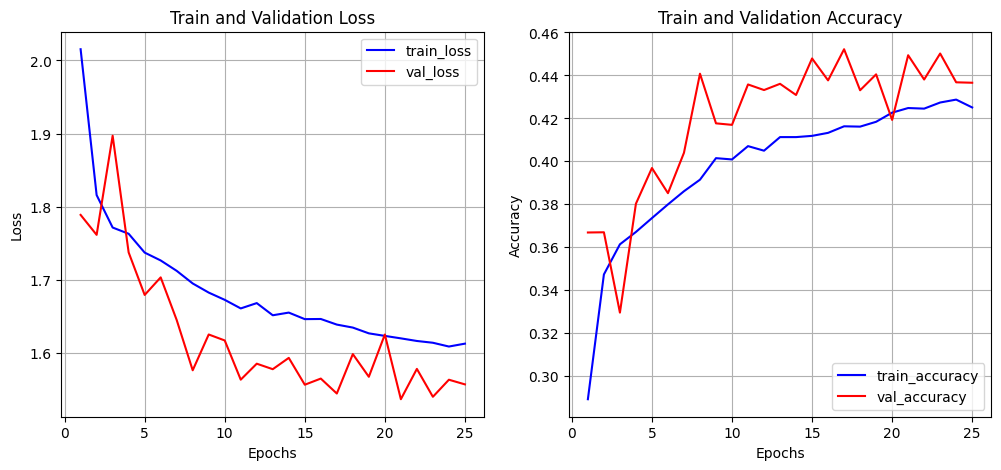

In [20]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
model_cifar.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4555 - loss: 1.5181


[1.5180878639221191, 0.4555000066757202]